<center>

# **Research Title: Design Insights for Time-Restricted Eating (TRE) Windows from Data Analytics**

In [1]:
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pip -U plotly
!pip install pandasql
# pip install plotly
!pip install pyreadstat
!pip install six
!pip install pydotplus
!pip install graphviz

import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandasql as ps
import statsmodels.api as sm 
import pydotplus, graphviz

from matplotlib import colors as c
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
from google.colab import drive
from statsmodels.stats.outliers_influence import variance_inflation_factor
from six import StringIO
from IPython.display import Image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=41dfa24a2372dad10dfe716cf89e5a0604d1e1f246c2abc6e2388d0bc1f6c7dd
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# allows to view the columns in 500 and no limit to view the rows
pd.options.display.max_columns = 500
pd.set_option('display.max_rows',None)

In [ ]:
# load the raw data
df, meta = pyreadstat.read_sav('/content/TRE_raw.sav')
df.sample(1)

,P_ID,Previous_clinic,GENDER,MARITAL,EMPLOY,OCC_CUR,OCC_MR,EDU,FREE_PRE,ETH,ETH_OTH,SMOKE,ALCOHOL,NO_BREK,SKIP_LUN,SNACK,POR_FRU,POR_VEG,BL_largest_meal,ATT_WL,METH1,METH2,METH3,METH4,METH5,METH6,G_WL_KG,method,WHEN,HOW_LNG,MONITOR,ILLNESS1,ILLNESS2,MEDS1,MEDS2,BL_HGT,BL_BMI,BL_BP_D,BL_BP_S,BL_7AM,BL_8AM,BL_9AM,BL_10AM,BL_11AM,BL_12PM,BL_1PM,BL_2PM,BL_3PM,BL_4PM,BL_5PM,BL_6PM,BL_7PM,BL_8PM,BL_9PM,BL_10PM,BL_11PM,BL_12AM,WGT_CON,METH1_A,METH2_A,METH3_A,METH4_A,BL_IPAQ_1A_VIGOROUS_DAYS,BL_IPAQ_1B_VIGOROUS_MINUTES,BL_IPAQ_1B_VIGOROUS_DONT_KNOW,BL_IPAQ_2A_MODERATE_DAYS,BL_IPAQ_2B_MODERATE_MINUTES,BL_IPAQ_2B_MODERATE_DONT_KNOW,BL_IPAQ_3A_WALK_DAYS,BL_IPAQ_3B_WALK_MINUTES,BL_IPAQ_3B_WALK_DONT_KNOW,BL_IPAQ_4A_SITTING_MINS,BL_IPAQ_4A_SITTING_DONT_KNOW,BL_Time_chosen,WK1_WGHT,WK1_NOWGT,Wk1_WGHT_SR,WK1_DAYS_COM,NO_REAS,NO_REAS2,WK1MON,WK1M_EAT_HRS,WK1M_FST_HRS,WK1TUES,WK1T_EAT_HRS,WK1T_FST_HRS,WK1WEDS,WK1W_EAT_HRS,WK1W_FST_HRS,WK1THURS,WK1TH_EAT_HRS,WK1TH_FST_HRS,WK1FRI,WK1F_EAT_HRS,WK1F_FST_HRS,WK1SAT,WK1ST_EAT_HRS,WK1ST_FST_HRS,WK1SUN,WK1SUEAT_HRS,WK1SU_FAST_HRS,AVG_EAT,AVG_FST,STK_7DY,WK1_AD,WK1_HEL,WK1_FD,WK1_DIFF,WK1_LIK,WK1_HUN,WK1_HUNGER_TIME,WK1_BARRIER1,WK1_BARRIER2,WK1_BARRIER3,WK1_BARRIER4,WK1_STICK1,WK1_STICK2,WK1_STICK3,WGT_CON_A,METH1_B,METH2_B,METH3_B,METH4_B,WK1_FB,WK1_MON_HUNGER,WK1_TUES_HUNGER,WK1_WED_HUNGER,WK1_THUR_HUNGER,WK1_FRI_HUNGER,WK1_SAT_HUNGER,WK1_SUN_HUNGER,WK1_MON_MEAL,WK1_TUES_MEAL,WK1_WED_MEAL,WK1_THUR_MEAL,WK1_FRI_MEAL,WK1_SAT_MEAL,WK1_SUN_MEAL,Wk2_WGHT_SR,WK2_NOWGHT,WK2_DAYS_COMP,WK2_NO_REAS,WK2MON,WK2M_EAT,WK2M_FST,WK2TUES,WK2T_EAT,WK2T_FST,WK2WEDS,WK2W_EAT,WK2W_FST,WK2THURS,WK2TH_EAT,WK2TH_FST,WK2FRI,WK2F_EAT,WK2F_FST,WK2SAT,WK2SA_EAT,WK2SA_FST,WK2SUN,WK2SU_EAT,WK2SU_FST,WK2_AVG_EAT,WK2_AVG_FST,WK2_STK,WK2_ADH,WK2_HEL,WK2_FD,WK2_DIFF,WK2_LIK,WK2_HUN,WK2_HUNGER_TIME,WK2_WGT_CON,WK2_METH1,WK2_METH2,Wk3_WGHT_SR,WK3_NOWGHT,WK3_DAYS_COMP,WK3_NO_REAS,WK3MON,WK3M_EAT,WK3M_FST,WK3TUES,WK3T_EAT,WK3T_FST,WK3WEDS,WK3W_EAT,WK3W_FST,WK3THURS,WK3TH_EAT,WK3TH_FST,WK3FRI,WK3F_EAT,WK3F_FST,WK3SAT,WK3SA_EAT,WK3SA_FST,WK3SUN,WK3SU_EAT,...,WK5_FD,WK5_DIFF,WK5_LIK,WK5_HUN,WK5_HUNGER_TIME,WK5_WGT_CON,WK5_METH1,WK5_METH2,WK6_NOWGT,STILL_TRE,NO_REAS_A,WK6_DAYS_COM,NO_REAS_B,NO_REAS2_A,WK6MON,WK6M_EAT,WK6M_FST,WK6TUES,WK6T_EAT,WK6T_FST,WK6WEDS,WK6W_EAT,WK6W_FST,WK6THURS,WK6TH_EAT,WK6TH_FST,WK6FRI,WK6F_EAT,WK6F_FST,WK6SAT,WK6SA_EAT,WK6SA_FST,WK6SUN,WK6SU_EAT,WK6SU_EA,WK6_AVG_EAT,WK6_AVG_FST,WK6_STK,WK6_ADH,WK6_HEL,WK6_FD,WK6_DIFF,WK6_LIK,WK6_HUN,WK6_HUNGER_TIME,WK6_BARRIER1,WK6_BARRIER2,WK6_BARRIER3,WK6_BARRIER4,WK6_STICK1,WK6_STICK2,WK6_STICK3,WGT_CON_B,METH1_C,METH2_C,METH3_C,METH4_C,WK6_FB,WK6_FB_A,WK6_FB_B,WK6_FB_C,Att12W,RetDC,WK12_WGT_NR,WK12_BL_WGT,WK12_BP_D_A,WK12_BP_S_A,STILL_TRE_A,NO_REAS_C,WK12_DAYS_COM,NO_REAS_D,NO_REAS2_B,WK12MON,WK12M_EAT,WK12M_FST,WK12TUES,WK12T_EAT,WK12T_FST,WK12WEDS,WK12W_EAT,WK12W_FST,WK12THURS,WK12TH_EAT,WK12TH_FST,WK12FRI,WK12F_EAT,WK12_FST,WK12SAT,WK12SA_EA,WK12SA_FST,WK12SUN,WK12SU_AVG,WK12_FST_A,WK12_STK,WK12_ADH,WK12_HEL,WK12_FD,WK12_DIFF,WK12_HUN,WK12_HUNGER_TIME,WK12_BARRIER1,WK12_BARRIER2,WK12_BARRIER3,WK12_BARRIER4,WK12_STICK1,WK12_STICK2,WK12_STICK3,CAR_ON,WGT_CON_C,METH1_D,METH2_D,METH3_D,METH4_D,REC_FF,WK12_FB,WK12_FB_A,WK12_FB_B,WK12_FB_C,WK12_FB_D,BL_IPAQ_1A_VIGOROUS_DAYS_A,BL_IPAQ_1B_VIGOROUS_MINUTES_A,BL_IPAQ_1B_VIGOROUS_DONT_KNOW_A,BL_IPAQ_2A_MODERATE_DAYS_A,BL_IPAQ_2B_MODERATE_MINUTES_A,BL_IPAQ_3A_WALK_DAYS_A,BL_IPAQ_3B_WALK_MINUTES_A,BL_IPAQ_3B_WALK_DONT_KNOW_A,BL_IPAQ_4A_SITTING_MINS_A,BL_IPAQ_4A_SITTING_DONT_KNOW_A,BL_TRI,BL_CHO,BL_HDL,BL_LDL,BL_NonHDL,WK12_TRI,WK12_CHO,WK12_HDL,WK12_LDL,WK12_NonHDL,WK12_AD,CHG_TRI,CHG_CHO,CHG_HDL,CHG_LDL,CHG_NONHDL,CHG_BP_D,CHG_BP_S,WGT_CHG_BL_WK6,WGT_CHG_BL_WK12,BOCF_LDL,BOCF_HDL,BOCF_CHO,BOCF_NONhdl,BOCF_D,BOCF_S,BOCF_TRI,BL_WGT_COMP,WK12_WGT_COMP,PER_CENT_LOSS,WK12_ADH_COMP,PERCENT5_LOSS,BOCF_WGT_BL_6WKS,BOCF_WGT_BL_12WKS,wgt_chk,reportwk6,Trurwk6,basedchk,AGE,RAT_CHG_HLP_BL_6WK,RAT_CHG_HLP_BL_12WK,RAT_CHG_HLP_BL_6W_to_12WK,RAT_CHG_D

In [ ]:
# general information of the raw dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 482 entries, P_ID to LOCF_CHG6
dtypes: float64(345), object(137)
memory usage: 188.4+ KB


In [ ]:
#count how many null values for each column
df.isna().sum()

P_ID                                0
Previous_clinic                     2
GENDER                              0
MARITAL                             0
EMPLOY                              0
OCC_CUR                             0
OCC_MR                              0
EDU                                 0
FREE_PRE                            0
ETH                                 0
ETH_OTH                             0
SMOKE                               0
ALCOHOL                             2
NO_BREK                             1
SKIP_LUN                            1
SNACK                               0
POR_FRU                             0
POR_VEG                             1
BL_largest_meal                     1
ATT_WL                              2
METH1                               0
METH2                               0
METH3                               0
METH4                               0
METH5                               0
METH6                               0
G_WL_KG     

In [ ]:
# process the null value for the column that the system will use
# habits data
df['ALCOHOL']=df['ALCOHOL'].fillna(df['ALCOHOL'].mean())
df['NO_BREK']=df['NO_BREK'].fillna(df['NO_BREK'].mean())
df['SKIP_LUN']=df['SKIP_LUN'].fillna(df['SKIP_LUN'].mean())
df['POR_VEG']=df['POR_VEG'].fillna(df['POR_VEG'].mean())
# blood data
df['BP_BL_SYS']=df['BP_BL_SYS'].fillna(df['BP_BL_SYS'].mean())
df['BP_BL_DIA']=df['BP_BL_DIA'].fillna(df['BP_BL_DIA'].mean())
df['BP_12_SYS']=df['BP_12_SYS'].fillna(df['BP_12_SYS'].mean())
df['BP_12_DIA']=df['BP_12_DIA'].fillna(df['BP_12_DIA'].mean())
# weight data
df['WGT1WK2']=df['WGT1WK2'].fillna(df['WGT1WK2'].mean())
df['WGHT6WK2']=df['WGHT6WK2'].fillna(df['WGHT6WK2'].mean())
df['WGHT12WK2']=df['WGHT12WK2'].fillna(df['WGHT12WK2'].mean())
#TRE window data
df['WK1M_EAT_HRS']=df['WK1M_EAT_HRS'].fillna(df['WK1M_EAT_HRS'].mean())
df['WK1T_EAT_HRS']=df['WK1T_EAT_HRS'].fillna(df['WK1T_EAT_HRS'].mean())
df['WK1W_EAT_HRS']=df['WK1W_EAT_HRS'].fillna(df['WK1W_EAT_HRS'].mean())
df['WK1TH_EAT_HRS']=df['WK1TH_EAT_HRS'].fillna(df['WK1TH_EAT_HRS'].mean())
df['WK1F_EAT_HRS']=df['WK1F_EAT_HRS'].fillna(df['WK1F_EAT_HRS'].mean())
df['WK1ST_EAT_HRS']=df['WK1ST_EAT_HRS'].fillna(df['WK1ST_EAT_HRS'].mean())
df['WK1SUEAT_HRS']=df['WK1SUEAT_HRS'].fillna(df['WK1SUEAT_HRS'].mean())

df['WK2M_EAT']=df['WK2M_EAT'].fillna(df['WK2M_EAT'].mean())
df['WK2T_EAT']=df['WK2T_EAT'].fillna(df['WK2T_EAT'].mean())
df['WK2W_EAT']=df['WK2W_EAT'].fillna(df['WK2W_EAT'].mean())
df['WK2TH_EAT']=df['WK2TH_EAT'].fillna(df['WK2TH_EAT'].mean())
df['WK2F_EAT']=df['WK2F_EAT'].fillna(df['WK2F_EAT'].mean())
df['WK2SA_EAT']=df['WK2SA_EAT'].fillna(df['WK2SA_EAT'].mean())
df['WK2SU_EAT']=df['WK2SU_EAT'].fillna(df['WK2SU_EAT'].mean())

df['WK3M_EAT']=df['WK3M_EAT'].fillna(df['WK3M_EAT'].mean())
df['WK3T_EAT']=df['WK3T_EAT'].fillna(df['WK3T_EAT'].mean())
df['WK3W_EAT']=df['WK3W_EAT'].fillna(df['WK3W_EAT'].mean())
df['WK3TH_EAT']=df['WK3TH_EAT'].fillna(df['WK3TH_EAT'].mean())
df['WK3F_EAT']=df['WK3F_EAT'].fillna(df['WK3F_EAT'].mean())
df['WK3SA_EAT']=df['WK3SA_EAT'].fillna(df['WK3SA_EAT'].mean())
df['WK3SU_EAT']=df['WK3SU_EAT'].fillna(df['WK3SU_EAT'].mean())

df['WK5M_EAT']=df['WK5M_EAT'].fillna(df['WK5M_EAT'].mean())
df['WK5T_EAT']=df['WK5T_EAT'].fillna(df['WK5T_EAT'].mean())
df['WK5W_EAT']=df['WK5W_EAT'].fillna(df['WK5W_EAT'].mean())
df['WK5TH_EAT']=df['WK5TH_EAT'].fillna(df['WK5TH_EAT'].mean())
df['WK5F_EAT']=df['WK5F_EAT'].fillna(df['WK5F_EAT'].mean())
df['WK5SA_EAT']=df['WK5SA_EAT'].fillna(df['WK5SA_EAT'].mean())
df['WK5SU_EA']=df['WK5SU_EA'].fillna(df['WK5SU_EA'].mean())

df['WK6M_EAT']=df['WK6M_EAT'].fillna(df['WK6M_EAT'].mean())
df['WK6T_EAT']=df['WK6T_EAT'].fillna(df['WK6T_EAT'].mean())
df['WK6W_EAT']=df['WK6W_EAT'].fillna(df['WK6W_EAT'].mean())
df['WK6TH_EAT']=df['WK6TH_EAT'].fillna(df['WK6TH_EAT'].mean())
df['WK6F_EAT']=df['WK6F_EAT'].fillna(df['WK6F_EAT'].mean())
df['WK6SA_EAT']=df['WK6SA_EAT'].fillna(df['WK6SA_EAT'].mean())
df['WK6SU_EAT']=df['WK6SU_EAT'].fillna(df['WK6SU_EAT'].mean())

df['WK12M_EAT']=df['WK12M_EAT'].fillna(df['WK12M_EAT'].mean())
df['WK12T_EAT']=df['WK12T_EAT'].fillna(df['WK12T_EAT'].mean())
df['WK12W_EAT']=df['WK12W_EAT'].fillna(df['WK12W_EAT'].mean())
df['WK12TH_EAT']=df['WK12TH_EAT'].fillna(df['WK12TH_EAT'].mean())
df['WK12F_EAT']=df['WK12F_EAT'].fillna(df['WK12F_EAT'].mean())
df['WK12SA_EA']=df['WK12SA_EA'].fillna(df['WK12SA_EA'].mean())
df['WK12SU_AVG']=df['WK12SU_AVG'].fillna(df['WK12SU_AVG'].mean())

In [ ]:
# add new column for AVG TRE TIME for week 1-3 and week 5, week 6 and week 12.
# no week 4 because there is no data for week 4 in the raw dataset
df['W1_AVG_TRE'] = df[['WK1M_EAT_HRS','WK1T_EAT_HRS','WK1W_EAT_HRS','WK1TH_EAT_HRS','WK1F_EAT_HRS','WK1ST_EAT_HRS','WK1SUEAT_HRS']].mean(axis=1)
df['W2_AVG_TRE'] = df[['WK2M_EAT','WK2T_EAT','WK2W_EAT','WK2TH_EAT','WK2F_EAT','WK2SA_EAT','WK2SU_EAT']].mean(axis=1)
df['W3_AVG_TRE'] = df[['WK3M_EAT','WK3T_EAT','WK3W_EAT','WK3TH_EAT','WK3F_EAT','WK3SA_EAT','WK3SU_EAT']].mean(axis=1)
df['W5_AVG_TRE'] = df[['WK5M_EAT','WK5T_EAT','WK5W_EAT','WK5TH_EAT','WK5F_EAT','WK5SA_EAT','WK5SU_EA']].mean(axis=1)
df['W6_AVG_TRE'] = df[['WK6M_EAT','WK6T_EAT','WK6W_EAT','WK6TH_EAT','WK6F_EAT','WK6SA_EAT','WK6SU_EAT']].mean(axis=1)
df['W12_AVG_TRE'] = df[['WK12M_EAT','WK12T_EAT','WK12W_EAT','WK12TH_EAT','WK12F_EAT','WK12SA_EA','WK12SU_AVG']].mean(axis=1)

#add new column to compare if the systolic/diastolic/ Blood pressure and the weight increase or not  
# 1 increase, 0 NO decrease
df['BLSYS_INCR'] = np.where((df['BP_BL_SYS'] < df['BP_12_SYS']), "1","0")
df['BLDIA_INCR'] = np.where((df['BP_BL_DIA'] < df['BP_12_DIA']), "1","0")
df['WGHT_INCR'] = np.where((df['BLWGT2'] < df['WGHT12WK2']), "1","0")

**Extract useful data from raw data**

In [ ]:
# will use the following columns for data visualization
df = df[["P_ID","AGE","GENDER","MARITAL","EMPLOY","SMOKE","EDU","ALCOHOL","ETH","NO_BREK","SKIP_LUN","SNACK","POR_FRU","POR_VEG",
           "BP_BL_SYS","BP_BL_DIA","BP_12_SYS","BP_12_DIA","BLSYS_INCR","BLDIA_INCR",
           "BLWGT2","WGT1WK2","WGHT6WK2","WGHT12WK2","WGHT_INCR",
           "W1_AVG_TRE","W2_AVG_TRE","W3_AVG_TRE","W5_AVG_TRE","W6_AVG_TRE","W12_AVG_TRE"]]
df.head(1)

,P_ID,AGE,GENDER,MARITAL,EMPLOY,SMOKE,EDU,ALCOHOL,ETH,NO_BREK,SKIP_LUN,SNACK,POR_FRU,POR_VEG,BP_BL_SYS,BP_BL_DIA,BP_12_SYS,BP_12_DIA,BLSYS_INCR,BLDIA_INCR,BLWGT2,WGT1WK2,WGHT6WK2,WGHT12WK2,WGHT_INCR,W1_AVG_TRE,W2_AVG_TRE,W3_AVG_TRE,W5_AVG_TRE,W6_AVG_TRE,W12_AVG_TRE
0,48.0,47.0,2.0,1.0,1.0,2.0,4.0,4.520833,1.0,0.0,0.0,2.0,1.0,3.0,137.0,95.0,148.0,104.0,1,1,116.3,115.6,110.4,108.1,0,7.0,7.748016,8.464286,8.178571,6.642857,7.529101


In [ ]:
# recomfirm if the processed dataset has null value
df.isna().sum()

P_ID           0
AGE            0
GENDER         0
MARITAL        0
EMPLOY         0
SMOKE          0
EDU            0
ALCOHOL        0
ETH            0
NO_BREK        0
SKIP_LUN       0
SNACK          0
POR_FRU        0
POR_VEG        0
BP_BL_SYS      0
BP_BL_DIA      0
BP_12_SYS      0
BP_12_DIA      0
BLSYS_INCR     0
BLDIA_INCR     0
BLWGT2         0
WGT1WK2        0
WGHT6WK2       0
WGHT12WK2      0
WGHT_INCR      0
W1_AVG_TRE     0
W2_AVG_TRE     0
W3_AVG_TRE     0
W5_AVG_TRE     0
W6_AVG_TRE     0
W12_AVG_TRE    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_ID         50 non-null     float64
 1   AGE          50 non-null     float64
 2   GENDER       50 non-null     float64
 3   MARITAL      50 non-null     float64
 4   EMPLOY       50 non-null     float64
 5   SMOKE        50 non-null     float64
 6   EDU          50 non-null     float64
 7   ALCOHOL      50 non-null     float64
 8   ETH          50 non-null     float64
 9   NO_BREK      50 non-null     float64
 10  SKIP_LUN     50 non-null     float64
 11  SNACK        50 non-null     float64
 12  POR_FRU      50 non-null     float64
 13  POR_VEG      50 non-null     float64
 14  BP_BL_SYS    50 non-null     float64
 15  BP_BL_DIA    50 non-null     float64
 16  BP_12_SYS    50 non-null     float64
 17  BP_12_DIA    50 non-null     float64
 18  BLSYS_INCR   50 non-null     object 
 19  BLDIA_INCR

**Overall visulaize**

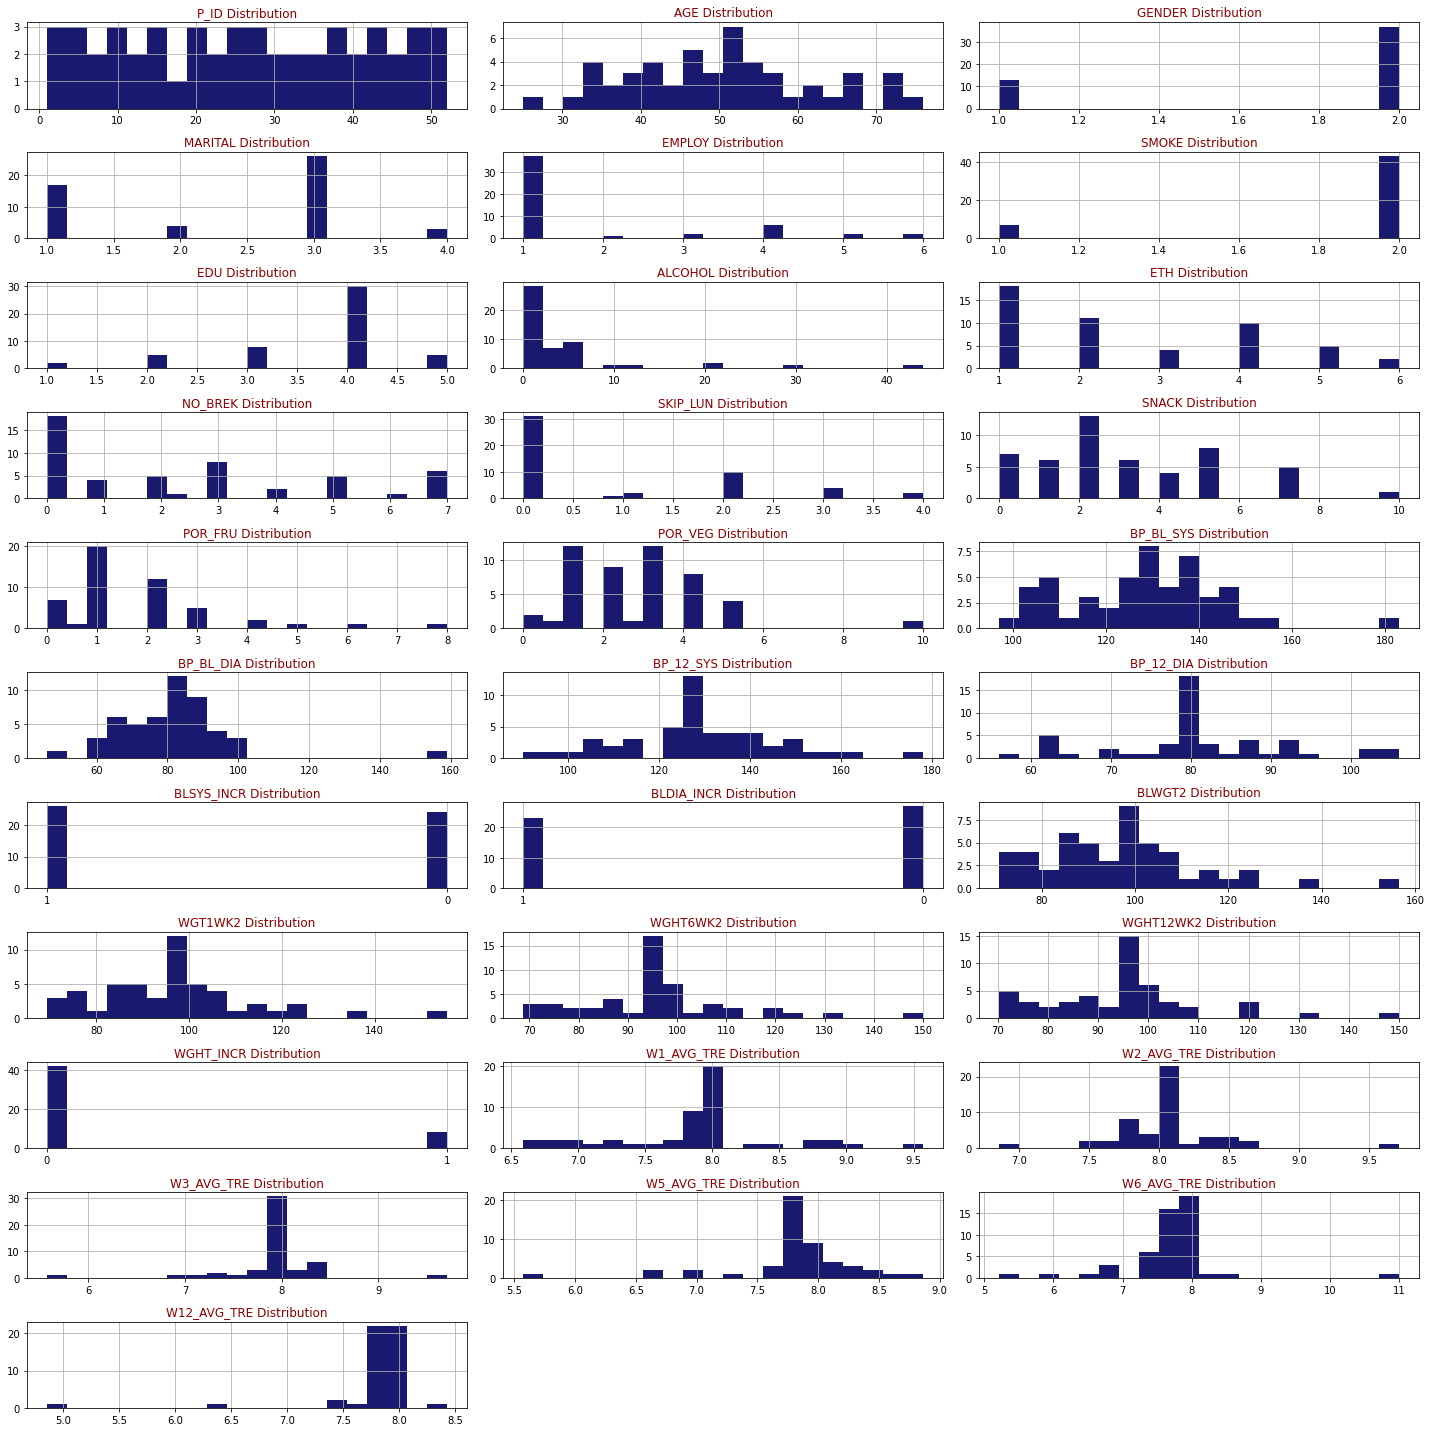

In [ ]:
# general overview of the statistic of all the columns
# as we can view, not all the columns are suitable for bar chart to analysis
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,11,3)

**Characteristic Visualize**

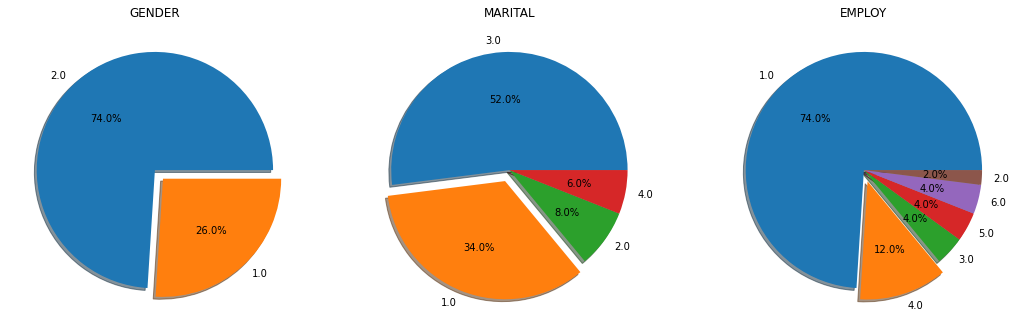

In [ ]:
# there are 6 attributes that has not too many values, se use pie chart to view clearly
# first is gender, marital and employ
f,ax=plt.subplots(1,3,figsize=(18,8))

df['GENDER'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GENDER')
ax[0].set_ylabel('')

df['MARITAL'].value_counts().plot.pie(explode=[0,0.1,0,0],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('MARITAL')
ax[1].set_ylabel('')

df['EMPLOY'].value_counts().plot.pie(explode=[0,0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('EMPLOY')
ax[2].set_ylabel('')
plt.show()

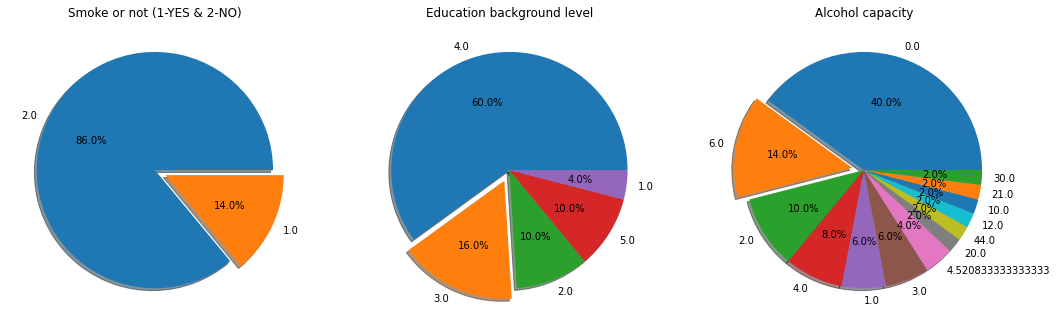

In [ ]:
# next is smoke, education, and alcohol
f,ax=plt.subplots(1,3,figsize=(18,8))

df['SMOKE'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Smoke or not (1-YES & 2-NO)')
ax[0].set_ylabel('')

df['EDU'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Education background level')
ax[1].set_ylabel('')

df['ALCOHOL'].value_counts().plot.pie(explode=[0,0.1,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('Alcohol capacity')
ax[2].set_ylabel('')

plt.show()

**Eating habits Visualize**

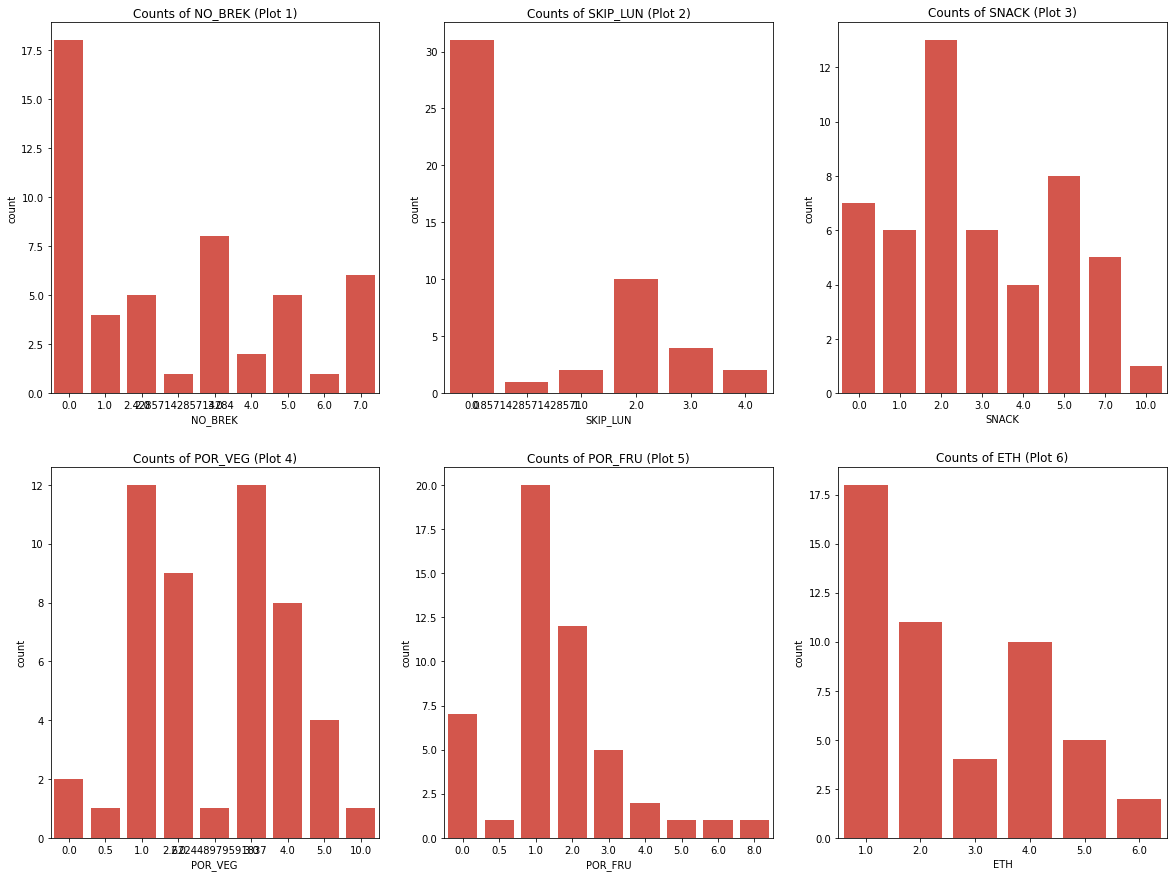

In [ ]:
# the following attributes use bar chart is good enough
# create a more clear bar chart
eathabit = [['NO_BREK','SKIP_LUN','SNACK'],['POR_VEG','POR_FRU','ETH']] 				

def printCount(cols):
    fig, axes = plt.subplots(2, 3, figsize=(20, 15))
    row=0
    col=0
    p_count=1
    for row in range(2):
        for col in range(3):
            # reads column name from the list
            column = eathabit[row][col]
            # plots the counts of the particular column
            sns.countplot(ax=axes[row,col],x=df[column],color="#ea4335")
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
printCount(eathabit)

**Blood pressure visualization**

Data Visualization of the subjects' blood pressure change 

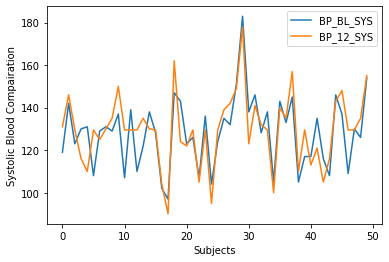

In [ ]:
# to compare the Systolic blood pressure change through line chart
line1 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["BP_BL_SYS"].sum())
line2 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["BP_12_SYS"].sum())

plt.xlabel("Subjects")
plt.ylabel("Systolic Blood Compairation")
plt.legend(['BP_BL_SYS','BP_12_SYS'])
plt.show()

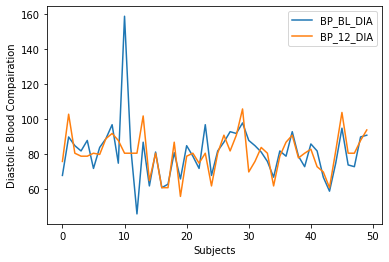

In [ ]:
# Diastolic blood pressure change through line chart
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["BP_BL_DIA"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["BP_12_DIA"].sum())
plt.xlabel("Subjects")
plt.ylabel("Diastolic Blood Compairation")
plt.legend(['BP_BL_DIA','BP_12_DIA'])
plt.show()

Text(0, 0.5, 'Counts')

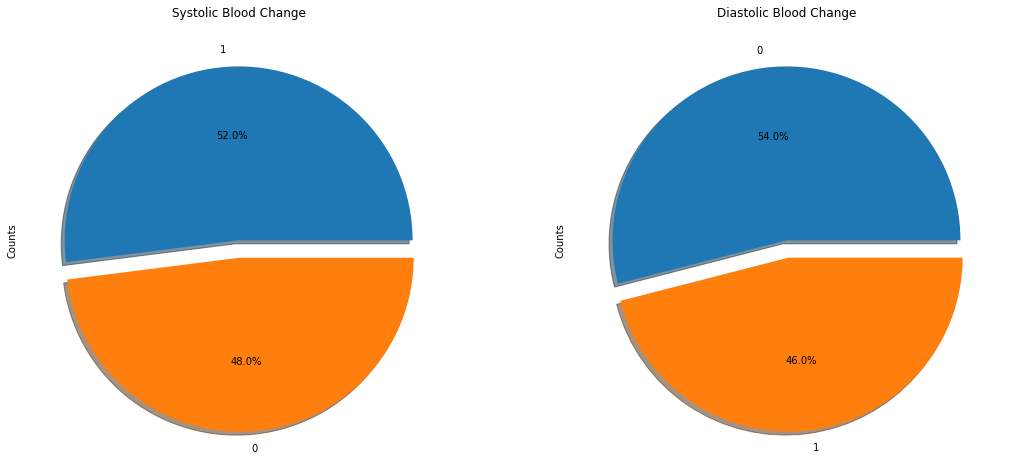

In [ ]:
# if blood increased, 1, decreased 0.
# as we have add the new column at the begining to compare if the blood change increase or decrease
# so draw the pie chart to view more clearly.
f,ax=plt.subplots(1,2,figsize=(18,8))

df['BLSYS_INCR'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Systolic Blood Change')
ax[0].set_ylabel('Counts')

df['BLDIA_INCR'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Diastolic Blood Change')
ax[1].set_ylabel('Counts')

**Weight compare visualization**

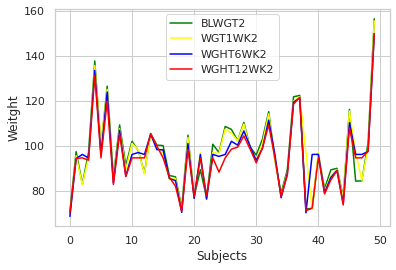

In [ ]:
# as steps to weight
sns.set(style="whitegrid")

y0 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["BLWGT2"].sum(), color='green')
y1 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["WGT1WK2"].sum(), color='yellow')
y2 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["WGHT6WK2"].sum(), color='blue')
y3 = sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["WGHT12WK2"].sum(), color='red')

plt.xlabel("Subjects")
plt.ylabel("Weitght")
plt.legend(['BLWGT2','WGT1WK2','WGHT6WK2','WGHT12WK2'])

plt.show()

In [ ]:
# if weight increased 1, decreased 0.
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Weight increase 1/ Decrease 0",),
    specs=[[{"type": "domain"}, {"type": "domain"}]],
)
fig.add_trace(go.Pie(labels=np.array(df['WGHT_INCR'].value_counts().index),
                     values=[x for x in df['WGHT_INCR'].value_counts()], 
                     textinfo='label+percent'),row=1, col=1)
fig.update_layout(height=400, font=dict(size=12), showlegend=False)

fig

TRE window Visualization

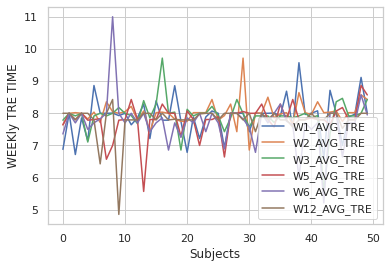

In [ ]:
# TRE window comparation
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W1_AVG_TRE"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W2_AVG_TRE"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W3_AVG_TRE"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W5_AVG_TRE"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W6_AVG_TRE"].sum())
sns.lineplot(x=list(range(0,50)),y=df.groupby("P_ID")["W12_AVG_TRE"].sum())


plt.xlabel("Subjects")
plt.ylabel("WEEKly TRE TIME")
plt.legend(['W1_AVG_TRE','W2_AVG_TRE','W3_AVG_TRE','W5_AVG_TRE','W6_AVG_TRE','W12_AVG_TRE'])

plt.show()

In [ ]:
df.drop(['P_ID'], axis = 1, inplace = True)

**Based on the Correlation to decide what attributes to construct data**

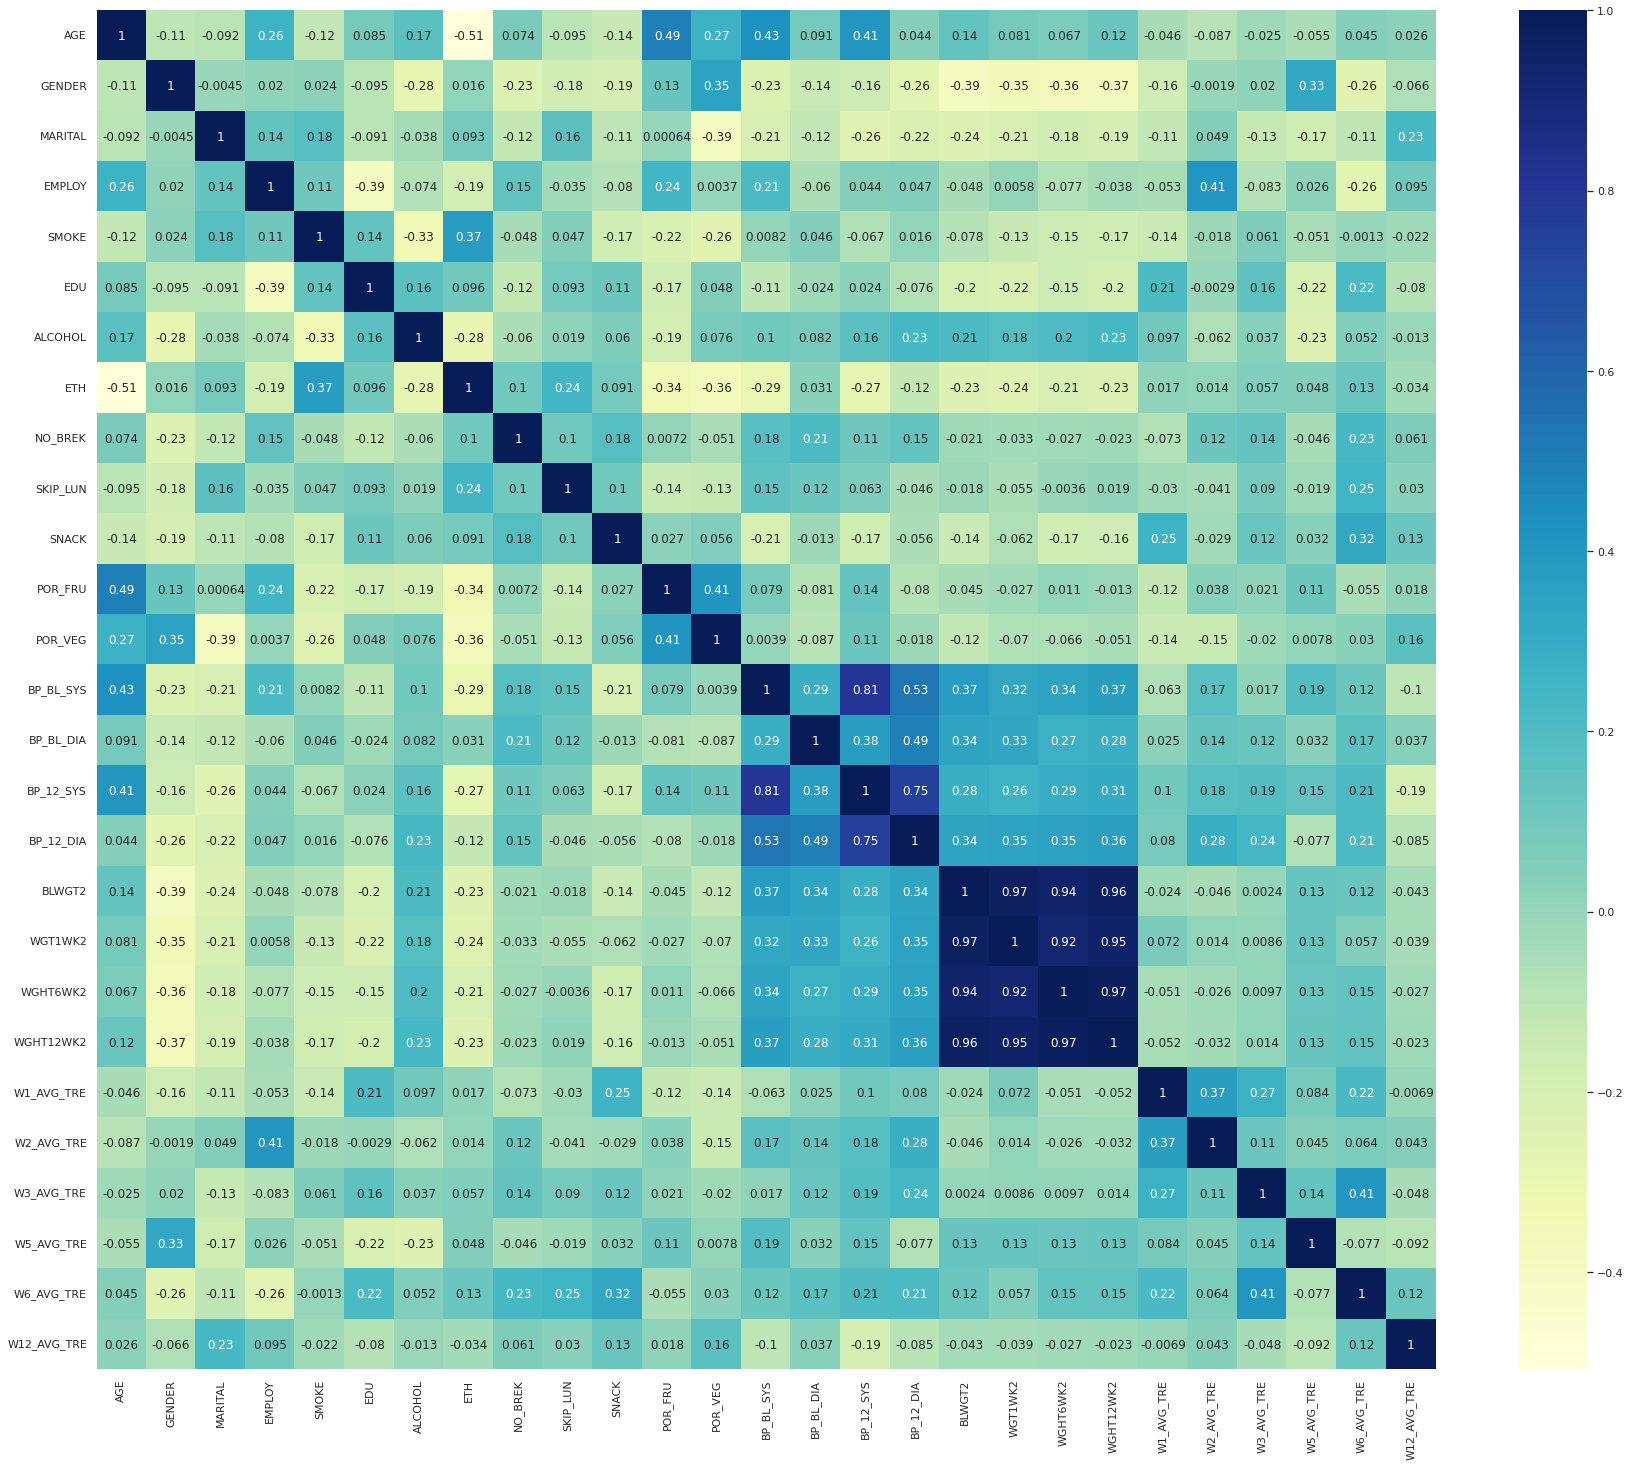

In [ ]:
# find which TRE winodw is more suitable to build the dataset for prediction
# also find the more related attributes
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**GENDER, MARITAL, EMOLPY, EDU, ETH, BP_BL_DIA, BP_BLSYS, WLWGT2, W6_AVG_TRE was selected**

In [ ]:
# rename some columns
df = df[["GENDER", "MARITAL", "EMPLOY", "EDU", "ETH", "BP_BL_DIA", "BP_BL_SYS", "BLWGT2", "W6_AVG_TRE"]]
df.rename(columns={"BLWGT2":"WEIGHT"}, inplace = True)
df.rename(columns={'W6_AVG_TRE':'N_TRE_WIN'}, inplace = True)
df.rename(columns={'BP_BL_DIA':'DIAS_BL'}, inplace = True)
df.rename(columns={'BP_BL_SYS':'SYS_BL'}, inplace = True)
df.head(1)

,GENDER,MARITAL,EMPLOY,EDU,ETH,DIAS_BL,SYS_BL,WEIGHT,N_TRE_WIN
0,2.0,1.0,1.0,4.0,1.0,95.0,137.0,116.3,6.642857


**Visualize the relation between different attribute to N_TRE_WIN**

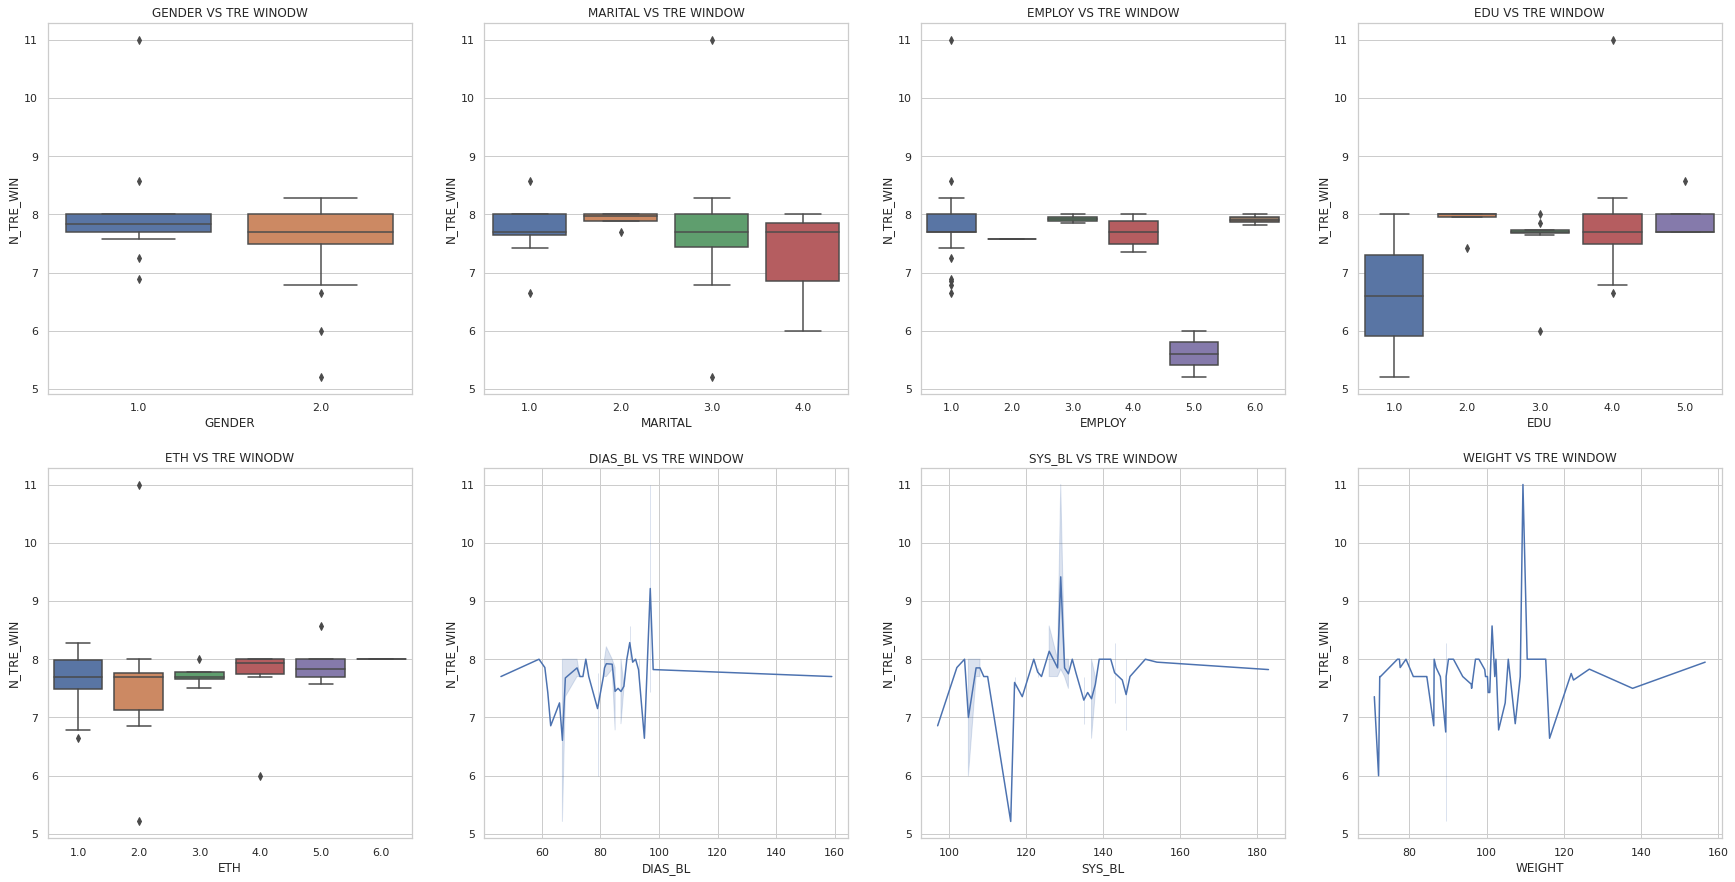

In [ ]:
#Visualize the relation between different attribute to N_TRE_WIN
fig,ax = plt.subplots(2,4,figsize=(30,15))
ax[0][0].title.set_text("GENDER VS TRE WINODW")
ax[0][1].title.set_text("MARITAL VS TRE WINDOW")
ax[0][2].title.set_text("EMPLOY VS TRE WINDOW")
ax[0][3].title.set_text("EDU VS TRE WINDOW")
sns.boxplot(x=df.GENDER,y=df.N_TRE_WIN, ax = ax[0][0])
sns.boxplot(x=df.MARITAL,y=df.N_TRE_WIN, ax = ax[0][1])
sns.boxplot(x=df.EMPLOY,y=df.N_TRE_WIN, ax = ax[0][2])
sns.boxplot(x=df.EDU,y=df.N_TRE_WIN, ax = ax[0][3])

ax[1][0].title.set_text("ETH VS TRE WINODW")
ax[1][1].title.set_text("DIAS_BL VS TRE WINDOW")
ax[1][2].title.set_text("SYS_BL VS TRE WINDOW")
ax[1][3].title.set_text("WEIGHT VS TRE WINDOW")
sns.boxplot(x=df.ETH,y=df.N_TRE_WIN, ax = ax[1][0])
sns.lineplot(x=df.DIAS_BL,y=df.N_TRE_WIN, ax = ax[1][1])
sns.lineplot(x=df.SYS_BL,y=df.N_TRE_WIN, ax = ax[1][2])
sns.lineplot(x=df.WEIGHT,y=df.N_TRE_WIN, ax = ax[1][3])

plt.show()

1.	The male population should choose a longer TRE window, usually 7-11 hours. The choice of TRE window for women is 5-8 hours. Most of the crowd of them chose 7-8 hours.
2.	The choice of the TRE window for the happily married people is very stable, around 8. However, the unmarried population and the population with more than 2 marriages have certain uncertainties in the selection of the TRE window. Especially for people with 2 marriages, the minimum TRE window may be 5 hours, and the maximum may reach 11 hours (that is, basically give up the implementation of the TRE method). 
3.	The choice of TRE window for working people is usually 7-8 hours. The choice of TRE window for freelancers such as retirees, housewives, and resigned people is full of randomness. For these people 7-11 hours are all possible.
4.	There is no obvious rule between educational level and execution of TRE window.
5.	There is randomness in the selection of TRE windows for people with race 2, while the selection of TRE windows for other races is mainly 7-8.
6.	People with normal blood pressure choose TRE more freely. For patients with hypertension and hypotension, the choice of TRE is mainly 7-8 hours, and it has a downward trend.
7.	The choice of TRE window for people with light weight is mainly 6-8 hours, the selection range of TRE window for people with weight over 110 is 6-11 hours, and the choice of TRE window for people with weight over 140 is based on 7.5 hours In a straight-line upward trend.


Load prediction dataset

In [4]:
dfpr = pd.read_csv('/content/TRE_bd.csv')
dfpr.sample(3)

,GENDER,MARITAL,EMPLOY,EDU,ETH,WEIGHT,SYS_BL,DIAS_BL,N_TRE_WIN
913,2,1,1,1,2,90.8,103.4,77.3,8
5925,1,2,1,4,5,168.0,97.6,66.3,8
9677,1,3,4,2,4,98.2,118.0,69.0,7


#**Linear regression model**#

In [6]:
np.random.seed(0)
df_train, df_test = train_test_split(dfpr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [8]:
scaler = MinMaxScaler()
_var = ['SYS_BL','GENDER','MARITAL','N_TRE_WIN','EMPLOY','EDU','ETH','WEIGHT','DIAS_BL']
df_train[_var] = scaler.fit_transform(df_train[_var])

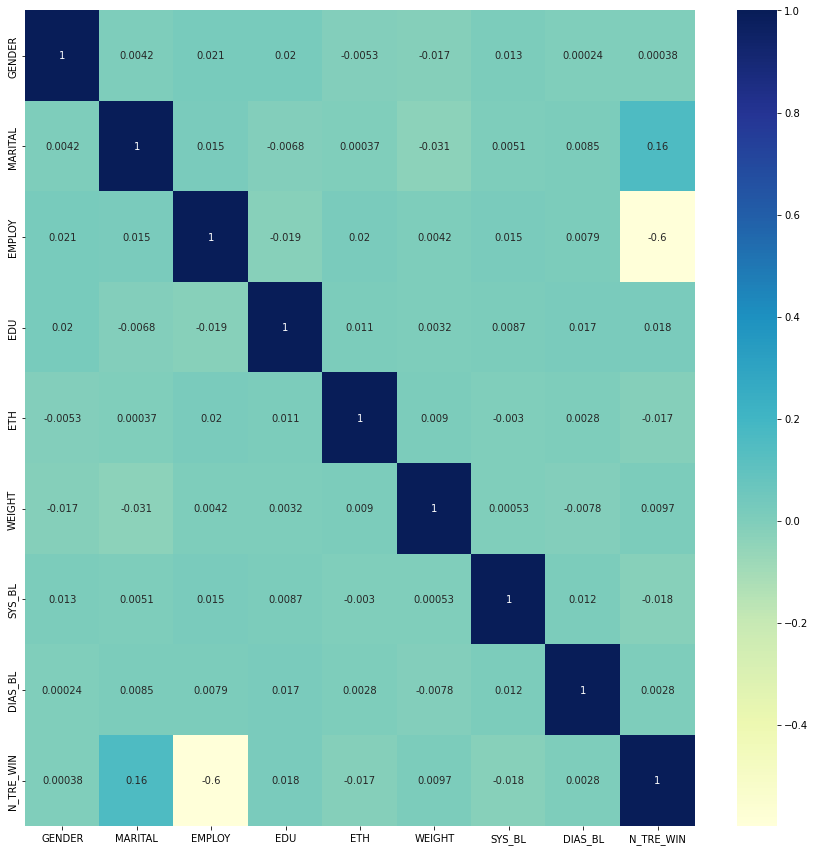

In [9]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [10]:
y_train = df_train.pop('N_TRE_WIN')
X_train = df_train

In [11]:
# ref algorithm to select features
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(estimator = lr, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)

In [12]:
col = X_train.columns[rfe.support_]
#X_train_rfe.head()
col

Index(['MARITAL', 'EMPLOY', 'WEIGHT', 'SYS_BL'], dtype='object')

In [13]:
X_train_rfe = X_train[col]

In [14]:
#import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# Running the linear model
lr = sm.OLS(y_train,X_train_rfe).fit()  

In [16]:
# the summary of our linear model
# ols results
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              N_TRE_WIN   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1108.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:56:36   Log-Likelihood:                 85.816
No. Observations:                7000   AIC:                            -161.6
Df Residuals:                    6995   BIC:                            -127.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6410      0.010     64.925      0.0

In [34]:
#X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [35]:
# VIF test for all the columns 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WEIGHT,3.28
3,SYS_BL,3.03
1,EMPLOY,2.60
0,MARITAL,2.37


In [18]:
y_train_tre = lr.predict(X_train_rfe)

In [19]:
res = (y_train_tre - y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

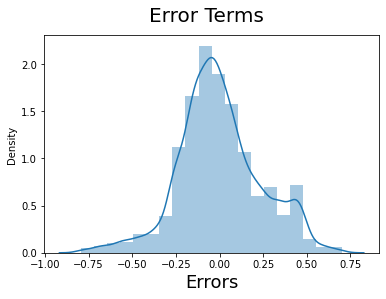

In [20]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_tre), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

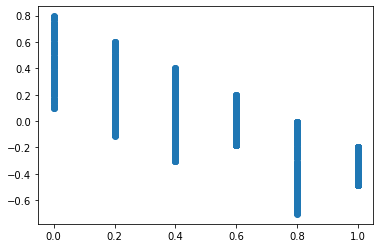

In [21]:
plt.scatter(y_train,res)
plt.show()

In [22]:
# Now let's use our model to make predictions.
#X_train_rfe.drop(['const'], axis = 1, inplace = True)
X_train_new = X_train_rfe.drop(['const'], axis = 1)

In [24]:
scaler = MinMaxScaler()
_var = ['SYS_BL','GENDER','MARITAL','N_TRE_WIN','EMPLOY','EDU','ETH','WEIGHT','DIAS_BL']
df_test[_var] = scaler.fit_transform(df_test[_var])

In [26]:
y_test_lr = df_test.pop('N_TRE_WIN')
X_test = df_test

In [27]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
#X_test_new.drop('const',axis=1,inplace = True)
X_test_new.head(1)

,const,MARITAL,EMPLOY,WEIGHT,SYS_BL
8018,1.0,1.0,0.0,0.496792,0.462712


In [29]:
y_test_pred_1 = lr.predict(X_test_new)

In [30]:
#linear regression is continuous, so only support R2 score
print ( "R2 score : %.2f" % r2_score (y_test_lr , y_test_pred_1 )) 


R2 score : 0.38


Text(0, 0.5, 'y_pred')

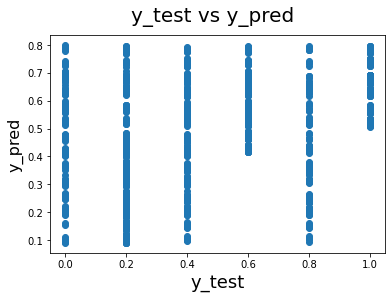

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_lr,y_test_pred_1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**Decision Tree Model**

In [ ]:
# Putting feature variable to X
X=dfpr.drop('SUITABLE_TRE', axis=1)

# Putting response variable to y
y=dfpr['SUITABLE_TRE']

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,X_test.shape


((7000, 8), (3000, 8))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred_2 = dt.predict(X_test)

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7634285714285715


array([[   0,  132,    0,   81,    0,   84],
       [   0, 2925,    0,   93,    0,  111],
       [   0,  234,    0,  124,    0,  241],
       [   0,    1,    0, 1399,    0,  163],
       [   0,  192,    0,   94,    0,  106],
       [   0,    0,    0,    0,    0, 1020]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn import metrics

print(accuracy_score(y_test, y_test_pred_2))
print(metrics.classification_report(y_test, y_test_pred_2))

0.7633333333333333
              precision    recall  f1-score   support

           5       0.00      0.00      0.00       120
           6       0.84      0.93      0.88      1364
           7       0.00      0.00      0.00       245
           8       0.76      0.88      0.82       655
           9       0.00      0.00      0.00       168
          10       0.60      1.00      0.75       448

    accuracy                           0.76      3000
   macro avg       0.37      0.47      0.41      3000
weighted avg       0.64      0.76      0.69      3000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_test_pred_2)


array([[   0,   51,    0,   43,    0,   26],
       [   0, 1267,    0,   56,    0,   41],
       [   0,   96,    0,   41,    0,  108],
       [   0,    1,    0,  575,    0,   79],
       [   0,   86,    0,   41,    0,   41],
       [   0,    0,    0,    0,    0,  448]])

**Random Forest**

In [ ]:
X = dfpr.drop('SUITABLE_TRE',axis=1)
y = dfpr['SUITABLE_TRE']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (10000, 8) 
 y_shape: (10000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Without ramdom over sampler
model_rf = RandomForestClassifier(criterion='entropy',n_estimators=20)
model_rf.fit(X_train, y_train)
y_test_pred_3 = model_rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_pred_3)*100
print(metrics.classification_report(y_test, y_test_pred_3))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00       120
           6       0.84      0.93      0.88      1364
           7       0.30      0.03      0.05       245
           8       0.75      0.87      0.81       655
           9       0.00      0.00      0.00       168
          10       0.60      0.94      0.74       448

    accuracy                           0.76      3000
   macro avg       0.42      0.46      0.41      3000
weighted avg       0.66      0.76      0.69      3000



In [ ]:
a_lr_1 = r2_score(y_test_lr,y_test_pred_1)*100
a_dt_1 = accuracy_score(y_test,y_test_pred_2)*100
a_rf_1 = accuracy_score(y_test,y_test_pred_3)*100

scores = [a_lr_1,a_dt_1,a_rf_1]

labels = ['Linear Regression Classifier', 'Decision Tree Classifier','Random Forest Classifier']
accs = {'Accuracy': scores}
df1 = pd.DataFrame(accs,index=labels)
df1

,Accuracy
Linear Regression Classifier,37.673009
Decision Tree Classifier,76.333333
Random Forest Classifier,75.866667


.